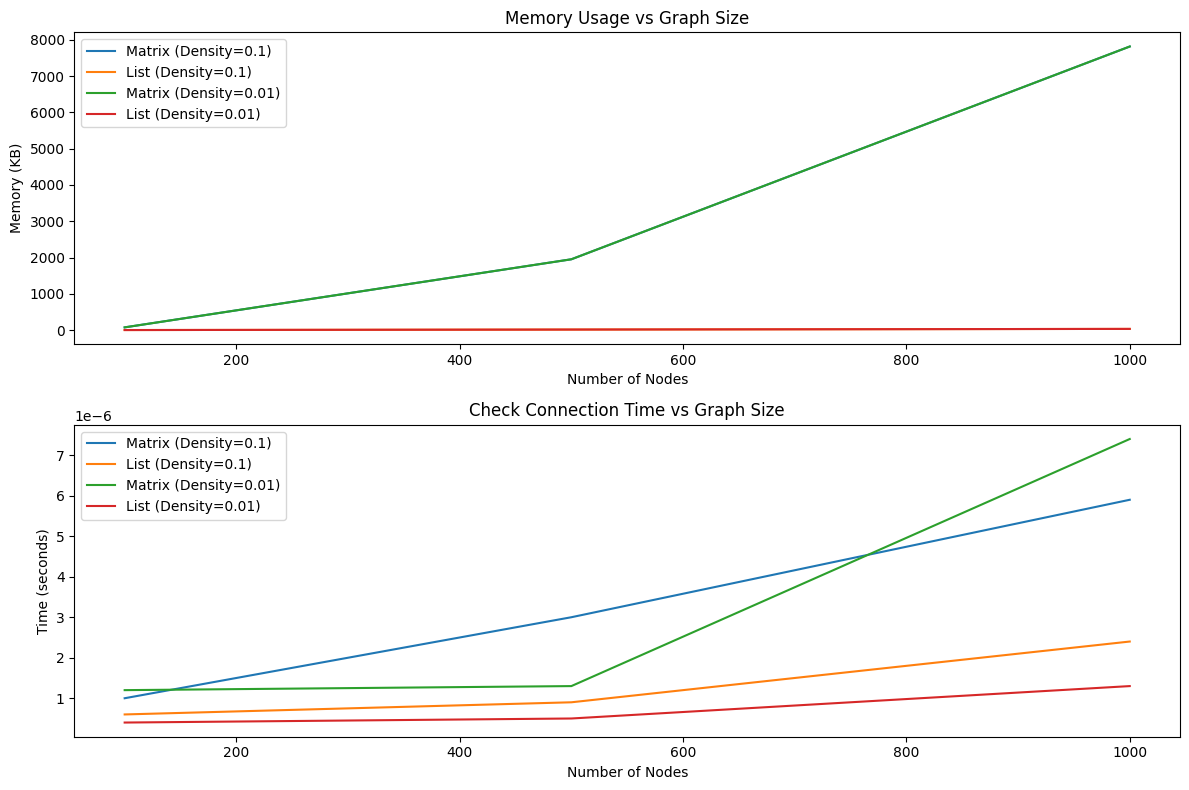

In [1]:
import numpy as np
import random
import time
import sys
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import networkx as nx

# Function to generate a random graph (Erdős-Rényi model)
def generate_graph(n, density):
    G = nx.erdos_renyi_graph(n, density, seed=42)
    return G

# Adjacency Matrix Representation
def to_adjacency_matrix(G):
    return np.array(nx.adjacency_matrix(G).todense())

# Adjacency List Representation
def to_adjacency_list(G):
    return {node: list(G.neighbors(node)) for node in G.nodes()}

# Measure memory usage for a given object
def measure_memory(obj):
    return sys.getsizeof(obj) / 1024  # Convert to KB

# Measure query time for checking if two nodes are connected
def check_connection_time(adj_matrix, adj_list, node1, node2, n):
    # Adjacency Matrix
    start = time.perf_counter()
    _ = adj_matrix[node1][node2]
    matrix_time = time.perf_counter() - start

    # Adjacency List
    start = time.perf_counter()
    _ = node2 in adj_list[node1]
    list_time = time.perf_counter() - start

    return matrix_time, list_time

# Measure query time for finding neighbors
def find_neighbors_time(adj_matrix, adj_list, node, n):
    # Adjacency Matrix
    start = time.perf_counter()
    neighbors_matrix = [i for i in range(n) if adj_matrix[node][i] == 1]
    matrix_time = time.perf_counter() - start

    # Adjacency List
    start = time.perf_counter()
    neighbors_list = adj_list[node]
    list_time = time.perf_counter() - start

    return matrix_time, list_time

# Main experiment
def run_experiment():
    node_sizes = [100, 500, 1000]
    densities_levels = [0.01, 0.1]  # Sparse and Dense
    results = {
        'size': [],
        'density': [],
        'matrix_memory': [],
        'list_memory': [],
        'matrix_connect_time': [],
        'list_connect_time': [],
        'matrix_neighbors_time': [],
        'list_neighbors_time': []
    }

    for n in node_sizes:
        for density in densities_levels:
            # Generate graph
            G = generate_graph(n, density)
            
            # Convert to both representations
            adj_matrix = to_adjacency_matrix(G)
            adj_list = to_adjacency_list(G)
            
            # Measure memory
            matrix_mem = measure_memory(adj_matrix)
            list_mem = measure_memory(adj_list)
            
            # Select random nodes for queries
            node1, node2 = random.sample(range(n), 2)
            node = random.randint(0, n-1)
            
            # Measure query times
            matrix_conn_time, list_conn_time = check_connection_time(adj_matrix, adj_list, node1, node2, n)
            matrix_neigh_time, list_neigh_time = find_neighbors_time(adj_matrix, adj_list, node, n)
            
            # Store results
            results['size'].append(n)
            results['density'].append(density)
            results['matrix_memory'].append(matrix_mem)
            results['list_memory'].append(list_mem)
            results['matrix_connect_time'].append(matrix_conn_time)
            results['list_connect_time'].append(list_conn_time)
            results['matrix_neighbors_time'].append(matrix_neigh_time)
            results['list_neighbors_time'].append(list_neigh_time)

    return results

# Plot results
def plot_results(results):
    plt.figure(figsize=(12, 8))

    # Memory Usage Plot
    plt.subplot(2, 1, 1)
    for density in set(results['density']):
        idx = [i for i, d in enumerate(results['density']) if d == density]
        sizes = [results['size'][i] for i in idx]
        matrix_mem = [results['matrix_memory'][i] for i in idx]
        list_mem = [results['list_memory'][i] for i in idx]
        plt.plot(sizes, matrix_mem, label=f'Matrix (Density={density})')
        plt.plot(sizes, list_mem, label=f'List (Density={density})')
    plt.title('Memory Usage vs Graph Size')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Memory (KB)')
    plt.legend()

    # Query Time Plot (Check Connection)
    plt.subplot(2, 1, 2)
    for density in set(results['density']):
        idx = [i for i, d in enumerate(results['density']) if d == density]
        sizes = [results['size'][i] for i in idx]
        matrix_time = [results['matrix_connect_time'][i] for i in idx]
        list_time = [results['list_connect_time'][i] for i in idx]
        plt.plot(sizes, matrix_time, label=f'Matrix (Density={density})')
        plt.plot(sizes, list_time, label=f'List (Density={density})')
    plt.title('Check Connection Time vs Graph Size')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Time (seconds)')
    plt.legend()

    plt.tight_layout()
    plt.savefig('graph_comparison.png')
    plt.show()

# Run the experiment and plot
results = run_experiment()
plot_results(results)

# Save results for report
import pandas as pd
df = pd.DataFrame(results)
df.to_csv('graph_comparison_results.csv')

EJERCICIO 2

Node sizes: [10, 20, 50, 100, 200, 500]
ER average paths: [1.56, 1.71, 2.11, 2.36, 2.54, 2.75]
BA average paths: [1.71, 1.97, 2.5, 2.85, 3.21, 3.69]


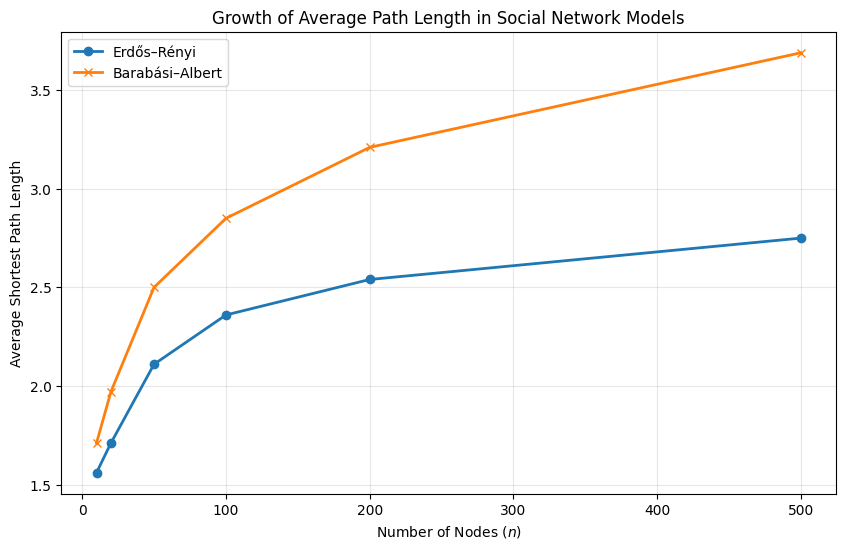

In [11]:
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt

# Define node sizes
node_sizes = [10, 20, 50, 100, 200, 500]

# Erdős–Rényi: Ensure connectivity
er_avg_paths = []
for n in node_sizes:
    p = max(2 * math.log(n) / n, 0.01) if n > 1 else 0.5  # Minimum p for small n
    G = nx.erdos_renyi_graph(n, p, seed=42)
    attempts = 0
    while not nx.is_connected(G) and attempts < 10:
        p *= 1.1
        G = nx.erdos_renyi_graph(n, p, seed=42 + attempts)
        attempts += 1
    if not nx.is_connected(G):
        raise ValueError(f"Failed to generate connected ER graph for n={n}")
    avg_path = nx.average_shortest_path_length(G)
    er_avg_paths.append(round(avg_path, 2))

# Barabási–Albert: m=2
ba_avg_paths = []
for n in node_sizes:
    if n < 3:  # BA requires n > m
        n = 3
    G = nx.barabasi_albert_graph(n, 2, seed=42)
    avg_path = nx.average_shortest_path_length(G)
    ba_avg_paths.append(round(avg_path, 2))

# Print results for table
print("Node sizes:", node_sizes)
print("ER average paths:", er_avg_paths)
print("BA average paths:", ba_avg_paths)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(node_sizes, er_avg_paths, label='Erdős–Rényi', marker='o', linewidth=2)
plt.plot(node_sizes, ba_avg_paths, label='Barabási–Albert', marker='x', linewidth=2)
plt.xlabel('Number of Nodes ($n$)')
plt.ylabel('Average Shortest Path Length')
plt.title('Growth of Average Path Length in Social Network Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('path_growth.png', dpi=300, bbox_inches='tight')
plt.show()


EJERCICIO 3

In [2]:
import random
import time
from collections import deque
import heapq
import networkx as nx
import numpy as np

# Generate connected undirected graph (Erdős-Rényi)
def generate_adj_unweighted(n, p):
    g = nx.erdos_renyi_graph(n, p)
    attempts = 0
    while not nx.is_connected(g) and attempts < 10:
        g = nx.erdos_renyi_graph(n, p)
        attempts += 1
    if not nx.is_connected(g):
        print(f"Could not generate connected graph for n={n}")
        return None
    adj = {i: list(g.neighbors(i)) for i in g.nodes()}
    return adj

# Convert to weighted adjacency list
def get_adj_with_weights(adj, uniform=True):
    if uniform:
        return {u: [(v, 1) for v in neigh] for u, neigh in adj.items()}
    else:
        return {u: [(v, random.uniform(1, 10)) for v in neigh] for u, neigh in adj.items()}

# BFS implementation
def bfs(adj, source):
    n = len(adj)
    dist = [-1] * n
    dist[source] = 0
    q = deque([source])
    ops = 0
    while q:
        u = q.popleft()
        for v in adj[u]:
            ops += 1
            if dist[v] == -1:
                dist[v] = dist[u] + 1
                q.append(v)
    return dist, ops

# Dijkstra implementation
def dijkstra(adj_w, source):
    n = len(adj_w)
    dist = [float('inf')] * n
    dist[source] = 0
    pq = [(0, source)]
    ops = 0
    while pq:
        d, u = heapq.heappop(pq)
        ops += 1
        if d > dist[u]:
            continue
        for v, w in adj_w[u]:
            ops += 1
            alt = dist[u] + w
            if alt < dist[v]:
                dist[v] = alt
                heapq.heappush(pq, (alt, v))
    return dist, ops

# Experiment parameters
n_list = [100, 200, 500, 1000, 2000]
p = 0.05
num_runs = 3
results = {
    'n': [],
    'time_bfs': [],
    'ops_bfs': [],
    'time_dijk_un': [],
    'ops_dijk_un': [],
    'time_dijk_w': [],
    'ops_dijk_w': []
}

for n in n_list:
    times_bfs = []
    ops_bfs = []
    times_d_un = []
    ops_d_un = []
    times_d_w = []
    ops_d_w = []
    for _ in range(num_runs):
        adj = generate_adj_unweighted(n, p)
        if adj is None:
            continue
        source = random.randint(0, n - 1)

        # BFS
        start = time.time()
        dist_bfs, ops_bfs_run = bfs(adj, source)
        times_bfs.append(time.time() - start)
        ops_bfs.append(ops_bfs_run)

        # Dijkstra (uniform weights)
        adj_uniform = get_adj_with_weights(adj, uniform=True)
        start = time.time()
        dist_d_un, ops_d_un_run = dijkstra(adj_uniform, source)
        times_d_un.append(time.time() - start)
        ops_d_un.append(ops_d_un_run)

        # Dijkstra (random weights)
        adj_weighted = get_adj_with_weights(adj, uniform=False)
        start = time.time()
        dist_d_w, ops_d_w_run = dijkstra(adj_weighted, source)
        times_d_w.append(time.time() - start)
        ops_d_w.append(ops_d_w_run)

    if times_bfs:
        results['n'].append(n)
        results['time_bfs'].append(np.mean(times_bfs))
        results['ops_bfs'].append(np.mean(ops_bfs))
        results['time_dijk_un'].append(np.mean(times_d_un))
        results['ops_dijk_un'].append(np.mean(ops_d_un))
        results['time_dijk_w'].append(np.mean(times_d_w))
        results['ops_dijk_w'].append(np.mean(ops_d_w))

# Print results
print("n\ttime_bfs\tops_bfs\ttime_dijk_un\tops_dijk_un\ttime_dijk_w\tops_dijk_w")
for i in range(len(results['n'])):
    print(f"{results['n'][i]}\t{results['time_bfs'][i]:.6f}\t{results['ops_bfs'][i]:.1f}\t"
          f"{results['time_dijk_un'][i]:.6f}\t{results['ops_dijk_un'][i]:.1f}\t"
          f"{results['time_dijk_w'][i]:.6f}\t{results['ops_dijk_w'][i]:.1f}")

n	time_bfs	ops_bfs	time_dijk_un	ops_dijk_un	time_dijk_w	ops_dijk_w
100	0.000046	504.0	0.000100	604.0	0.000106	638.7
200	0.000135	2025.3	0.000247	2225.3	0.000369	2374.7
500	0.000735	12506.0	0.001209	13006.0	0.001635	13620.3
1000	0.002786	49784.0	0.005774	50784.0	0.006940	52305.3
2000	0.010957	199326.7	0.018829	201326.7	0.022004	204954.7


EJERCICIO 4

In [10]:
import numpy as np
import networkx as nx

def generate_chain_graph(n):
    G = nx.DiGraph()
    for i in range(n):
        G.add_node(i)
    for i in range(n-1):
        G.add_edge(i, i+1)
    return G

def generate_star_graph(n):
    G = nx.DiGraph()
    for i in range(n):
        G.add_node(i)
    center = 0
    for i in range(1, n):
        G.add_edge(i, center)
    return G

def generate_random_graph(n):
    G = nx.erdos_renyi_graph(n, 0.1, directed=True)
    return G

def compute_pagerank(G, d=0.85, tol=1e-12, max_iter=10000):
    n = len(G.nodes)
    nodes = list(G.nodes)
    node_idx = {node: idx for idx, node in enumerate(nodes)}
    
    A = np.zeros((n, n))
    for u, v in G.edges:
        A[node_idx[u], node_idx[v]] = 1
    
    out_deg = np.sum(A, axis=1)
    dangling = out_deg == 0
    out_deg[dangling] = 1
    
    P = A / out_deg[:, np.newaxis]
    P[dangling, :] = 1.0 / n
    
    r = np.ones(n) / n
    iter_count = 0
    while iter_count < max_iter:
        r_new = (1 - d) / n + d * np.dot(P.T, r)
        diff = np.linalg.norm(r_new - r, 1)
        r = r_new
        iter_count += 1
        if diff < tol:
            break
    
    ranks = {nodes[i]: r[i] for i in range(n)}
    return ranks, iter_count

G = generate_chain_graph(10)
ranks, iters = compute_pagerank(G)
print(ranks, iters)

{0: np.float64(0.027528214337967098), 1: np.float64(0.05092719652526208), 2: np.float64(0.07081633138450606), 3: np.float64(0.08772209601490531), 4: np.float64(0.10209199595075623), 5: np.float64(0.11430641089619166), 6: np.float64(0.12468866359972841), 7: np.float64(0.13351357839763614), 8: np.float64(0.14101475597579413), 9: np.float64(0.14739075691725304)} 74


EJERCICIO 5

In [ ]:
import networkx as nx
import random
import time
import psutil
from collections import deque

def generate_random_dag(n_nodes, edge_prob=0.3):
    G = nx.DiGraph()
    G.add_nodes_from(range(n_nodes))
    for i in range(n_nodes):
        for j in range(i + 1, n_nodes):
            if random.random() < edge_prob:
                G.add_edge(i, j)
    return G

def topological_sort(G):
    in_degree = dict(G.in_degree())
    queue = deque([node for node in in_degree if in_degree[node] == 0])
    order = []
    while queue:
        node = queue.popleft()
        order.append(node)
        for neighbor in G.successors(node):
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                queue.append(neighbor)
    if len(order) == len(G.nodes()):
        return order
    else:
        return None

def add_random_cycle(G):
    nodes = list(G.nodes())
    if len(nodes) < 3:
        return
    attempts = 0
    while attempts < 10:
        start = random.choice(nodes)
        current = start
        path = [start]
        for _ in range(random.randint(2, min(5, len(nodes)-1))):
            successors = list(G.successors(current))
            if not successors:
                break
            current = random.choice(successors)
            if current in path:
                break
            path.append(current)
        if len(path) >= 3:
            if not G.has_edge(path[-1], path[0]):
                G.add_edge(path[-1], path[0])
                return
        attempts += 1
    if len(nodes) >= 3:
        cycle_nodes = random.sample(nodes, 3)
        G.add_edge(cycle_nodes[0], cycle_nodes[1])
        G.add_edge(cycle_nodes[1], cycle_nodes[2])
        G.add_edge(cycle_nodes[2], cycle_nodes[0])

def measure(G, has_cycle_expected):
    start_time = time.perf_counter()
    order = topological_sort(G)
    end_time = time.perf_counter()
    time_taken = end_time - start_time
    memory_mb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024.0
    has_cycle_detected = order is None
    return time_taken, memory_mb, has_cycle_detected

ModuleNotFoundError: No module named 'resource'